# <center>Linear Regression</center>
## <center>Cheatsheet</center>

## Linear Regression
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Official Doc</a>
- fit a line to your data
- usefull if the data has a linear relationship
- `` y = mx+b``
- goal is to minimize the red line between the line and the dots
  
  
<img width="400" src="images/regressionBasic.png">

# Direct Marketing - Amount Spent by Customers

## The Dataset
## Source: https://www.kaggle.com/yoghurtpatil/direct-marketing

### Dataset Documentation
The data set includes data from a direct marketer who sells his products only via direct mail. He sends catalogs with product characteristics to customers who then order directly from the catalogs. The marketer has developed customer records to learn what makes some customers spend more than others. The data set includes n = 1000 customers and the following variables:
- Age (of customer; old/middle/young);
- Gender (male/female);
- OwnHome (whether customer owns home; yes/no)
- Married (single/married);
- Location (far/close; in terms of distance to the nearest brick and mortar store that sells similar products); 
- Salary (yearly salary of customer; in dollars);
- Children (number of children; 0–3); 
- History (of previous purchase volume; low/medium/high/NA; NA means that this customer has not yet purchased); 
- Catalogs (number of catalogs sent);
- and AmountSpent (in dollars).

### The objective is to explain AmountSpent in terms of the provided customer characteristics.

## Data cleaning and preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

##that everything is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv("DirectMarketing.csv")

In [2]:
data.shape

(1000, 10)

In [3]:
data.head(10)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
5,Young,Male,Own,Married,Close,30400,0,Low,6,495
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155
8,Middle,Female,Own,Married,Close,51900,3,Low,6,158
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034


In [4]:
data.describe(include="all")

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
count,1000,1000,1000,1000,1000,1000.000000,1000.00000,697,1000.000000,1000.000000
unique,3,2,2,2,2,NaN,NaN,3,NaN,NaN
top,Middle,Female,Own,Married,Close,NaN,NaN,High,NaN,NaN
freq,508,506,516,502,710,NaN,NaN,255,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,56103.900000,0.93400,NaN,14.682000,1216.770000
std,NaN,NaN,NaN,NaN,NaN,30616.314826,1.05107,NaN,6.622895,961.068613
min,NaN,NaN,NaN,NaN,NaN,10100.000000,0.00000,NaN,6.000000,38.000000
25%,NaN,NaN,NaN,NaN,NaN,29975.000000,0.00000,NaN,6.000000,488.250000
50%,NaN,NaN,NaN,NaN,NaN,53700.000000,1.00000,NaN,12.000000,962.000000
75%,NaN,NaN,NaN,NaN,NaN,77025.000000,2.00000,NaN,18.000000,1688.500000


### checking for missing values
- replacing missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
data.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [7]:
data.History.unique()

array(['High', 'Low', 'Medium', nan], dtype=object)

In [8]:
data.History = data.History.fillna("Never")
data.History.head(10)

0      High
1      High
2       Low
3      High
4      High
5       Low
6    Medium
7      High
8       Low
9     Never
Name: History, dtype: object

### splitting in Test and Train and X and Y

In [9]:
from sklearn.model_selection import train_test_split

trainData, testData = train_test_split(data, test_size=0.25, random_state=42)

trainData_x = trainData.drop(["AmountSpent"], axis=1)
trainData_y = trainData.AmountSpent

testData_x = testData.drop(["AmountSpent"], axis=1)
testData_y = testData.AmountSpent


print("train X: ", trainData_x.shape)
print("train Y: ", trainData_y.shape)

print("test X: ", testData_x.shape)
print("test Y: ", testData_y.shape)


train X:  (750, 9)
train Y:  (750,)
test X:  (250, 9)
test Y:  (250,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe660739b10>,
      dtype=object)

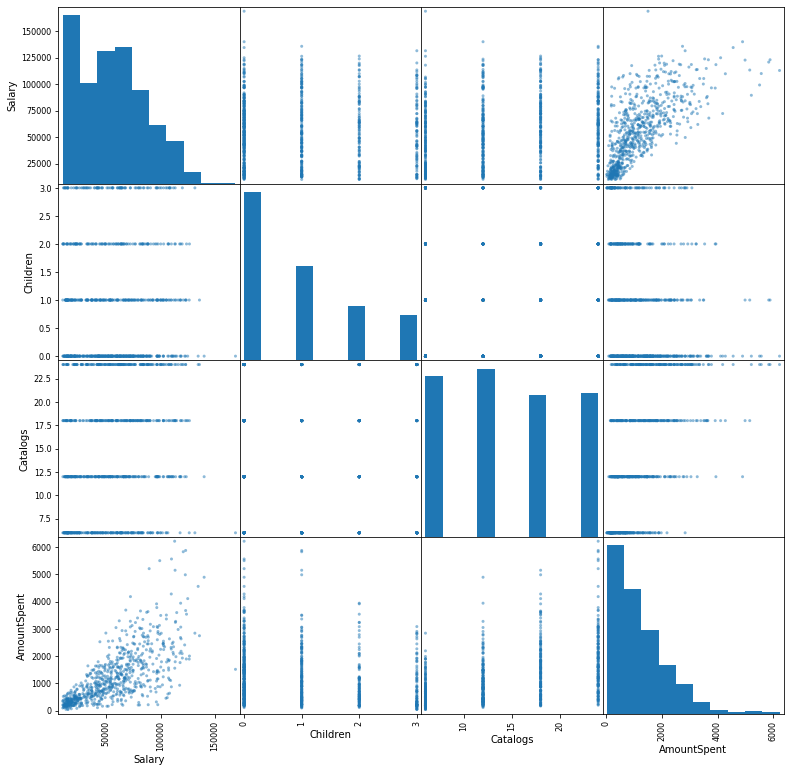

In [10]:
pd.plotting.scatter_matrix(trainData, diagonal='hist', figsize=(13,13))

In [11]:
columnsToHotEncode = ["Age", "Gender", "OwnHome", "Married", "Location", "History"]

trainData_x = pd.get_dummies(trainData_x, prefix_sep="__", columns=columnsToHotEncode)
testData_x = pd.get_dummies(testData_x, prefix_sep="__", columns=columnsToHotEncode)

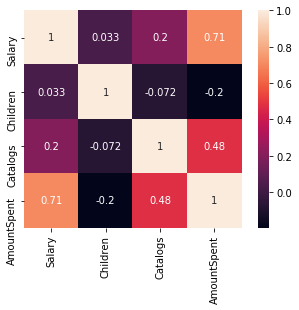

In [12]:
import seaborn as sns
corr = trainData.corr()
sns.heatmap(corr, square=True, annot=True)

## Basic Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(trainData_x, trainData_y)

reg.score(testData_x ,testData_y)


0.7324724115287646

regressor.score() gives the r^2 
  
source: https://www.investopedia.com/terms/r/r-squared.asp
  
What Does R-Squared Tell You?
R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all movements of a security (or another dependent variable) are completely explained by movements in the index (or the independent variable(s) you are interested in).

In [14]:
from sklearn.metrics import mean_squared_error

pred_testData_y = reg.predict(testData_x)
mean_squared_error(testData_y, pred_testData_y)

192956.73069330613

In [15]:
pred_trainData_y = reg.predict(trainData_x)
mean_squared_error(trainData_y, pred_trainData_y)

250941.38690535145